In [83]:
%matplotlib inline

# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)

city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

combined_cr_df = pd.merge(city_df, ride_df, how="left", on="city")

combined_cr_df.head()

# Display the data table for preview

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [84]:
# Obtain the x and y coordinates for each of the three city types

# ESTABLISH THE THREE CITY TYPES

urban_df = combined_cr_df[combined_cr_df["type"] == "Urban"]

suburban_df = combined_cr_df[combined_cr_df["type"] == "Suburban"]

rural_df = combined_cr_df[combined_cr_df["type"] == "Rural"]


# CALCULATE TOTAL RIDES PER CITY TYPE

urban_tr = urban_df.groupby("city")["ride_id"].count()

suburban_tr = suburban_df.groupby("city")["ride_id"].count()

rural_tr = rural_df.groupby("city")["ride_id"].count()


# CALCULATE AVERAGE FARE PER CITY TYPE

urban_ave = urban_df.groupby(['city']).mean()['fare']

suburban_ave = suburban_df.groupby(['city']).mean()['fare']

rural_ave = rural_df.groupby(['city']).mean()['fare']


# CALCULATE TOTAL DRIVERS PER CITY TYPE

urban_td = urban_df.groupby("city")["driver_count"].count()

suburban_td = suburban_df.groupby("city")["driver_count"].count()

rural_td = rural_df.groupby("city")["driver_count"].count()

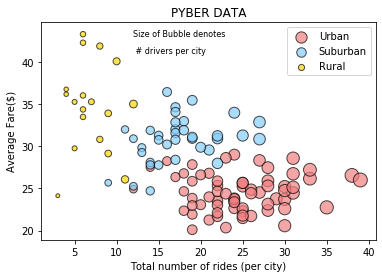

In [85]:
# Build the scatter plots for each city types

plt.scatter(urban_tr, urban_ave , s=urban_td*5 , c='#F08080', alpha=.7, edgecolor="black", marker="o", label="Urban")

plt.scatter(suburban_tr, suburban_ave , s=suburban_td*5 , c='#87CEFA', alpha=.7, edgecolor="black", marker="o", label="Suburban")

plt.scatter(rural_tr, rural_ave , s=rural_td*5 , c='#FFD700', alpha=.7, edgecolor="black", marker="o", label="Rural")

# Incorporate the other graph properties

plt.title("PYBER DATA")
plt.xlabel("Total number of rides (per city)")
plt.ylabel("Average Fare($)")

# Create a legend

plt.legend()

# Incorporate a text label regarding circle size

plt.text(12, 43,"Size of Bubble denotes ", fontsize=8)
plt.text(12, 41," # drivers per city", fontsize=8)

# Save Figure

plt.savefig("../Images/bubble_plot.png")

## Total Fares by City Type

In [86]:
# Calculate Type Percents

total_fare_pie = combined_cr_df.groupby(["type"])["fare"].sum()

print(total_fare_pie)

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64


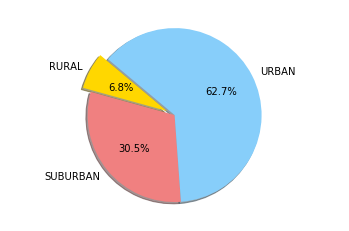

In [87]:
# Build Pie Chart

# SET COLORS

colors = ["gold", "lightcoral", "lightskyblue"]

# SET LABELS

labels = ["RURAL", "SUBURBAN", "URBAN"]

# SET EXPLODE

explode = (0.1, 0, 0)

# EQUAL AXIS

plt.axis("equal")

# CODE PIE CHART

plt.pie(total_fare_pie, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)

plt.show()

In [88]:
# Save Figure

plt.savefig("../Images/ride_pie.png")

<Figure size 432x288 with 0 Axes>

## Total Rides by City Type

In [89]:
# Calculate Ride Percents

total_ride_pie = combined_cr_df.groupby(["type"])["ride_id"].sum()

print(total_ride_pie)



type
Rural        580968240341287
Suburban    3106884522576766
Urban       7919412664056093
Name: ride_id, dtype: int64


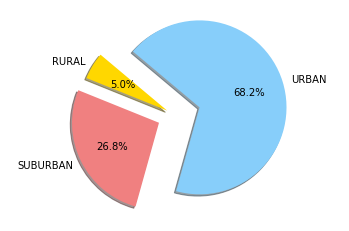

In [90]:
# Build Pie Chart

# SET COLORS

colors = ["gold", "lightcoral", "lightskyblue"]

# SET LABELS

labels = ["RURAL", "SUBURBAN", "URBAN"]

# SET EXPLODE

explode = (0.1, 0.2, 0.3)

# EQUAL AXIS

plt.axis("equal")

# CODE PIE CHART

plt.pie(total_ride_pie, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)

plt.show()

In [91]:
# Save Figure
plt.savefig("../Images/ride2_pie.png")

<Figure size 432x288 with 0 Axes>

## Total Drivers by City Type

In [92]:
# Calculate Driver Percents

total_driver_pie = combined_cr_df.groupby(["type"])["driver_count"].sum()

print(total_driver_pie)

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64


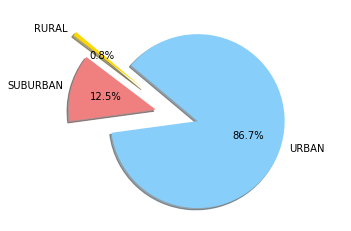

In [93]:
# Build Pie Charts

# SET COLORS

colors = ["gold", "lightcoral", "lightskyblue"]

# SET LABELS

labels = ["RURAL", "SUBURBAN", "URBAN"]

# SET EXPLODE

explode = (0.5, 0.25, 0.25)

# EQUAL AXIS

plt.axis("equal")

# CODE PIE CHART

plt.pie(total_driver_pie, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)

plt.show()

In [94]:
# Save Figure

plt.savefig("../Images/driver_pie.png")

<Figure size 432x288 with 0 Axes>